# On the Baby Doe Law and an Attempted Ammendment
## Lenix Carter

Occasionally, a curiosity fills you with such excitement that you stay up until four in the morning chasing it. You pour over a sudden passion project with fervor and excitement, trying to learn all of the details. In my raw curiosity to learn, data science, I found myself diving into Congressional voting records from 1984. I was skimming through the UC Irvine data sets when, for some reason, I landed upon this one.

It is worth noting (just in advance of my import statements) that this is my first time using pandas and the first time in quite a while using pylab.

In [1]:
import pandas as pd
import pylab as plt

We begin by defining each of the issues as described in a seperate file. The files originally were of the form 'el-salvador-aid'; however, I chose to space seperate the issues as I find it easier to read.

In [2]:
issues = ['affiliation', 'handicapped infants', 'water project cost sharing', 
           'physician fee freeze', 'el salvador aid', 'religious groups in schools', 
           'anti satellite test ban', 'aid to nicaraguan contras', 'mx missile', 
           'immigration', 'synfuels comporation cutback', 'education spending', 
           'superfund right to sue', 'crime', 'duty free exports', 
           'export administration act south africa']

Next, we read in the voting records from a comma-seperated file. Many interesting topics were up for debate in this year. Consider the depressingly titled "handicapped infants" and the now somewhat ironic "aid to nicaraguan contras."

We then list the head and tail of the file to get a general sense of the shape of the data.

Across our columns we have the affiliations and then issues of the year.

Across our rows we have voters 0-434.

In [3]:
vote_table = pd.read_csv('house-votes-84.data', sep=",", header = None, names = issues, index_col = False)
vote_table.head()

,affiliation,handicapped infants,water project cost sharing,physician fee freeze,el salvador aid,religious groups in schools,anti satellite test ban,aid to nicaraguan contras,mx missile,immigration,synfuels comporation cutback,education spending,superfund right to sue,crime,duty free exports,export administration act south africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y


In [4]:
vote_table.tail()

,affiliation,handicapped infants,water project cost sharing,physician fee freeze,el salvador aid,religious groups in schools,anti satellite test ban,aid to nicaraguan contras,mx missile,immigration,synfuels comporation cutback,education spending,superfund right to sue,crime,duty free exports,export administration act south africa
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n
434,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,?


Next for posterity, we use `describe()` on the DataFrame. From this we can gleam many things quickly (e.g. every issue had a neither yes nor no vote, democrats were the house majority that year.) 

Most notable for this research is that "handicapped infants" failed to pass. 

In [5]:
vote_table.describe()

,affiliation,handicapped infants,water project cost sharing,physician fee freeze,el salvador aid,religious groups in schools,anti satellite test ban,aid to nicaraguan contras,mx missile,immigration,synfuels comporation cutback,education spending,superfund right to sue,crime,duty free exports,export administration act south africa
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233


We narrow our focus to simply affiliation and the votes on handicapped infants. 

In [6]:
doe_vote = vote_table.loc[0:, ['affiliation', 'handicapped infants']]
doe_vote.head()

,affiliation,handicapped infants
0,republican,n
1,republican,n
2,democrat,?
3,democrat,n
4,democrat,y


If you notice, I have since named the table containing only the affiliation and votes on handicapped infants `doe_vote`. The law that handicapped infants is referring to is referred to as Baby Doe Law. The case refers to two major cases where a baby with a disability was denied a life-saving or life-prolonging surgery. The law pushed to add "witholding of treatment" of such a baby as "medical neglect."[<sup>[1]</sup>](https://en.wikipedia.org/wiki/Baby_Doe_Law)

Further research shows, that this law does eventually pass[<sup>[2]</sup>](https://ajph.aphapublications.org/doi/pdf/10.2105/AJPH.74.7.727). 

In the hyperspecificity in our legal system, the ammendment discussed herein attempt to rein back control of the HHS to more supervisory roles.[<sup>[3]</sup>](https://www.congress.gov/amendment/98th-congress/house-amendment/579?q={"search"%3A["Infants"]}&r=4&s=7) 

In [7]:
doe_vote.describe()

,affiliation,handicapped infants
count,435,435
unique,2,3
top,democrat,n
freq,267,236


##### Forming a Hypothesis

We make a few assumptions here. Firstly, republicans tend to be more "right-to-life" than democrats. Secondly, this is seen as a "right-to-life" issue. As such, with our data we expect to see a higher degree of repbulicans voting against this law.

We examine the overall voting record by plotting it on a bar graph.

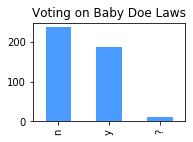

In [8]:
fig_dims=(2, 2)
plt.subplot2grid(fig_dims, (1, 0))
doe_vote['handicapped infants'].value_counts().plot(kind="bar",
                                                    title="Voting on Baby Doe Laws",
                                                    color="#499bff")

Next, we compare affiliation to votes using `.crosstab()`.

In [9]:
vote_affil = pd.crosstab(doe_vote['affiliation'], doe_vote['handicapped infants'])
vote_affil

handicapped infants,?,n,y
affiliation,,,
democrat,9,102,156
republican,3,134,31


We normalize the values. 

In [10]:
percent_vote = vote_affil.div(vote_affil.sum(1).astype(float), axis=0)

We graph them. 

Text(0, 0.5, 'Percent Vote')

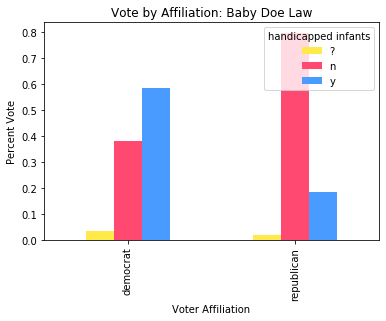

In [11]:
colors = ["#ffea49", "#ff4970", "#499bff"]

percent_vote.plot(kind='bar',
                  stacked=False,
                  title='Vote by Affiliation: Baby Doe Law',
                  color=colors)
plt.xlabel('Voter Affiliation')
plt.ylabel('Percent Vote')

As expected, we can visually tell that republicans voted nay with a much higher frequency than democrats. 

Let's explore this relationship further. 

We can now examine what percentages of votes belonged to either affiliation.

In [12]:
affil_makeup = vote_affil.div(vote_affil.sum(0).astype(float), axis=1)
affil_makeup

handicapped infants,?,n,y
affiliation,,,
democrat,0.75,0.432203,0.834225
republican,0.25,0.567797,0.165775


Text(0, 0.5, 'Percent Vote')

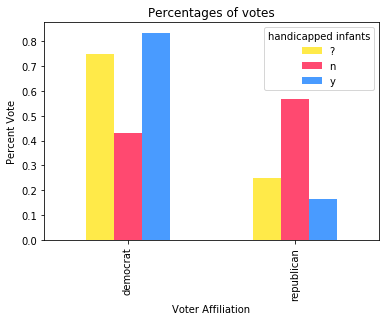

In [13]:
colors = ["#ffea49", "#ff4970", "#499bff"]

affil_makeup.plot(kind='bar',
                  stacked=False,
                  title='Percentages of votes',
                  color=colors)
plt.xlabel('Voter Affiliation')
plt.ylabel('Percent Vote')

Here we see that democrats made up a severe majority of yeas, but a slight minority of nays. This follows our hypothesis.

---

##### A Conclusion of sorts
This data is not particularly meaningful, except for the fact that there was a lot to learn by analyzing it. Through this, I have become more confident with statistical relationships as well as Pandas and Matplotlib. This is intended to be an ongoing project as the laws discussed herein are actually quite fascinating. I'm not sure how much more I may do with the statistical analysis of this, but it is nonetheless interesting.